<a href="https://colab.research.google.com/github/tonykipkemboi/Gap_Inc._Virtual_Learning_Experience_COVID_DS_Project/blob/updates/GAP_Inc_COVID_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD DATA


##Dependencies

In [161]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import datetime

##Data load

In [162]:
# Set URL to GitHub repo data (US confirmed cases and death)
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

confirmed_data_raw = pd.read_csv(url_confirmed)
death_data_raw = pd.read_csv(url_death)

# DATA CLEANING

##Filter Confirmed Cases Data

In [163]:
# Drop unecessary columns in confirmed df
colms = ['UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Lat', 'Long_', 'Country_Region']
confirmed_data_raw = confirmed_data_raw.drop(confirmed_data_raw[colms], axis=1)
state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
              'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
              'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
              'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia']
state_df = confirmed_data_raw[confirmed_data_raw['Province_State'].isin(state)]
state_df = state_df[pd.notna(state_df['FIPS'])]
state_df = state_df.rename(columns=({'Province_State':'US_State'}))
#state_df.head()

# Sum confirmed cases by state per day
state_sum_conf = state_df.groupby(['US_State']).sum()
state_sum_conf1 = state_sum_conf[state_sum_conf.columns[1:]]
# sum the total confimed cases under new column
state_sum_conf1['Confirmed_Totals'] = state_sum_conf1.sum(axis=1)
state_sum_conf1.reset_index(inplace=True)
state_sum_conf1.head()

,US_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,Confirmed_Totals
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,525049,525477,525898,526131,526348,526707,527083,527513,527922,528309,528597,528784,528784,529446,530011,530325,530744,530988,531094,531404,531751,532895,537813,539829,540083,540267,540603,540891,541230,541673,541928,542124,542256,542562,542831,543177,543405,543405,543405,106101077
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66909,67059,67059,67059,67509,67647,67834,68002,68148,68148,68148,68426,68518,68666,68762,68880,68880,68880,69117,69178,69267,69351,69464,69464,69464,69600,69657,69756,69835,69902,69902,69902,69999,70052,70119,70162,70208,70208,70208,11988507
2,Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,856451,857347,858076,858737,859487,860169,860772,861653,862497,863571,863927,864579,865280,866022,866623,867443,868382,868830,869472,870155,870624,871168,872022,872496,872978,873446,874065,874605,875195,875766,876411,876732,877182,877682,878338,879102,879909,880466,880466,167253521
3,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,334222,334458,334642,334706,334769,334998,335289,335529,335725,335968,336105,336166,336462,336760,336948,337170,337415,337510,337586,337819,338043,338235,338485,338687,338782,338849,339162,339406,339662,339863,340040,340137,340186,340515,340698,340916,341130,341290,341351,65658407
4,California,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,...,3727913,3729116,3731145,3731770,3734562,3736745,3738327,3740038,3742115,3743681,3744937,3747337,3749580,3750644,3753173,3755869,3757115,3758137,3760303,3761779,3763281,3764405,3767052,3768087,3768805,3769827,3771240,3772702,3774494,3775619,3776346,3777077,3778555,3779998,3781120,3786459,3787911,3788713,3789227,700690012


## Filter Death Data


In [164]:
# Drop unecessary columns and invalid states
cols = ['UID', 'iso2', 'iso3', 'code3','Lat', 'Long_', 'Admin2', 'Country_Region']
death_df = death_data_raw.drop(death_data_raw[cols], axis=1)
death_df = death_df.rename(columns=({'Province_State':'US_State'}))
death_df.reset_index(inplace=True)
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
              'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
              'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
              'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia']
states_df = death_df[death_df['US_State'].isin(states)]
states_df = states_df[pd.notna(states_df['FIPS'])]
del states_df['FIPS']
#states_df.head()

# Sum all counties and aggregate by state and country (US)
state_sum = states_df.groupby(['US_State']).sum()
state_sum.reset_index(inplace=True)
del state_sum['index']
#state_sum1 = state_sum[state_sum.columns[:]]
#state_sum1['Death_Totals'] = state_sum1[2:].sum(axis=1)
state_sum.head()

,US_State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21
0,Alabama,4903185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10807,10824,10840,10851,10851,10852,10854,10879,10887,10896,10913,10913,10913,10913,10930,10946,10966,10978,10978,10978,10985,10997,11001,11024,11038,11038,11038,11043,11045,11077,11080,11112,11112,11112,11124,11138,11140,11146,11146,11146
1,Alaska,740995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,334,334,334,334,334,347,347,347,347,347,347,347,348,348,348,349,349,349,349,349,351,353,353,353,353,353,364,368,369,369,369,369,369,369,369,369,369,369,369,369
2,Arizona,7278717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17199,17221,17238,17260,17268,17268,17276,17282,17305,17324,17338,17344,17344,17355,17360,17367,17391,17407,17409,17409,17428,17430,17438,17447,17459,17459,17466,17480,17497,17509,17531,17547,17555,17555,17569,17576,17594,17609,17628,17628
3,Arkansas,3017804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5708,5711,5716,5717,5718,5720,5725,5726,5735,5739,5741,5743,5747,5752,5754,5757,5759,5760,5761,5764,5770,5777,5783,5790,5793,5794,5796,5805,5805,5808,5811,5816,5817,5820,5824,5827,5829,5830,5830,5832
4,California,39512223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61193,61309,61401,61445,61479,61500,61526,61587,61672,61768,61866,61939,61967,62029,62070,62154,62220,62280,62314,62334,62365,62472,62573,62633,62656,62690,62699,62727,62765,62817,62862,62911,62933,62949,62986,63017,63168,63218,63236,63247


##Create a DF with June 2020 Confirmed Cases Data

In [165]:
# create df for month of June 2020
June_df = state_sum_conf1.loc[:,'6/1/20':'6/30/20']
states_list = state_sum_conf1['US_State']
June_df['June_Totals'] = June_df[June_df.columns[:]].sum(axis=1)

# DF with June 2020 total confirmed cases only
June_Tot = pd.DataFrame(June_df['June_Totals'])
states_list_df = pd.DataFrame(states_list)
June_Totals_df = states_list_df.join(June_Tot)
June_Totals_df.head()

,US_State,June_Totals
0,Alabama,812738
1,Alaska,23332
2,Arizona,1294975
3,Arkansas,402154
4,California,4991174


##Create a DF with population data only

In [166]:
# create a df with population data only
df_states = pd.DataFrame(state_sum['US_State'])
df_pop = pd.DataFrame(state_sum['Population'])
joined_df = df_states.join(df_pop) 
joined_df.head()

,US_State,Population
0,Alabama,4903185
1,Alaska,740995
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


##Merge pop_df with June_Totals_df

In [167]:
# join both df
right = June_Totals_df
left = joined_df
merged_df = left.merge(right)
merged_df.head()

,US_State,Population,June_Totals
0,Alabama,4903185,812738
1,Alaska,740995,23332
2,Arizona,7278717,1294975
3,Arkansas,3017804,402154
4,California,39512223,4991174


# QUESTION 1:
##The most often used metric for overall rate of spread of the disease for a particular geography is cases per capita, which is the number of cases in that region divided by the population. Please calculate the infection rate per capita by state for June2021.

In [168]:
# per capita rate calculation of infection per 100k people
# x/total * 100000= infection PER 100K people
result = (merged_df['June_Totals']/merged_df['Population'] * 100000)
merged_df['Per_Capita (PER 100k)'] = result.round(0)
merged_df.head()

,US_State,Population,June_Totals,Per_Capita (PER 100k)
0,Alabama,4903185,812738,16576.0
1,Alaska,740995,23332,3149.0
2,Arizona,7278717,1294975,17791.0
3,Arkansas,3017804,402154,13326.0
4,California,39512223,4991174,12632.0


# QUESTION 2:
##Plot the infection rate by state (per capita as above) by day for 2021for the largest 4 states in the US; Florida, California, Texas, and New York. 

##Florida

,US_State,Population,Date,Value,Per_Capita (PER 100K)
0,Florida,21477737,2021-01-01,1323315,6161.0
1,Florida,21477737,2021-01-02,1354833,6308.0
2,Florida,21477737,2021-01-03,1365436,6357.0
3,Florida,21477737,2021-01-04,1376692,6410.0
4,Florida,21477737,2021-01-05,1392123,6482.0


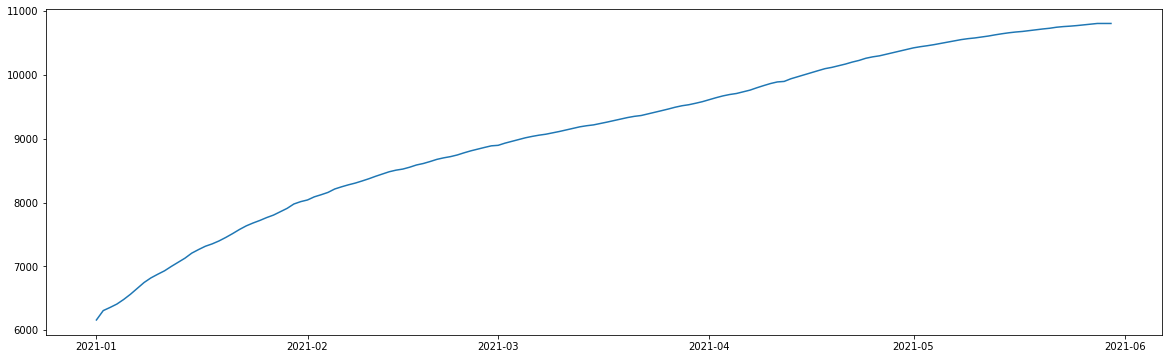

In [195]:
# isolate florida and dates starting [1/1/21 - today]
this_year_df = state_sum_conf1
ytd_df = this_year_df.loc[this_year_df['US_State'] == 'Florida']
fl = pd.DataFrame(ytd_df['US_State'])
ytd = pd.DataFrame(ytd_df.loc[:,'1/1/21':])
del ytd['Confirmed_Totals']

# get FL population from death df
fl_pop = state_sum.loc[state_sum['US_State'] == 'Florida']
popl = fl_pop['Population']

# merge fl state name, population and ytd data
right = ytd
left = fl
fl_ytd_df = left.join(right)
fl_ytd_df = fl_ytd_df.join(popl)

# melt the df
melted_df = fl_ytd_df.melt(id_vars=['US_State', 'Population'],
               var_name = 'Date',
               value_name = 'Value')
# convert the 'Date' column to datetime format
melted_df['Date']= pd.to_datetime(melted_df['Date'])
melted_df['Per_Capita (PER 100K)'] = ((melted_df['Value'] / melted_df['Population']) * 100000).round(0)
fig, ax = plt.subplots(figsize=(20,6))
x = melted_df['Date']
y = melted_df['Per_Capita (PER 100K)']
ax.plot(x,y)
melted_df.head()

# QUESTION 3:
##Using the infections data and recent trends in how cases are moving, please come up with a methodology for forecasting the number of cases you expect to see in these 4 states for the next 90 days.

# QUESTION 4:
##Compare your forecasts to the one from the Institute of Health Metrics at the University of Washington (https://covid19.healthdata.org/projections)? How are your forecasts similar or different?